###                                                                     Appendix


### Final Team Project: Computer Vision Bean Classification

 In this project, we aim to build a model using the Dry_Bean_Dataset.csv dataset which is created using computer vision for determining features to classify beans.

Authors:

   #### Abanather Negusu
   #### Fatemeh Khosravi
   #### Zachariah Freitas



### Requirements

In [2]:

# import all packages and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
from sklearn.model_selection import train_test_split
import random
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import re
from scipy import stats
from sklearn.metrics import plot_confusion_matrix
import random
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


### Data Importing and Pre-processing

Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.
Dry Bean Dataset:

    1.Area (A): The area of a bean zone and the number of pixels within its boundaries.
    2.Perimeter (P): Bean circumference is defined as the length of its border.
    3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
    4.Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to
    the main axis.
    
    5.Aspect ratio (K): Defines the relationship between L and l.
    6.Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
    7.Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean
    seed.
    
    8.Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
    9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
    10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in
    beans.
    
    11.Roundness (R): Calculated with the following formula: (4piA)/(P^2)
    12.Compactness (CO): Measures the roundness of an object: Ed/L
    13.ShapeFactor1 (SF1)
    14.ShapeFactor2 (SF2)
    15.ShapeFactor3 (SF3)
    16.ShapeFactor4 (SF4)
    17.Class (Cl): One of 7 different registered dry beans(SEKER, BARBUNYA, BOMBAY, CALI, HOROZ, SIRA, 
    DERMASON).




### Read Dataset and Display Info

In [4]:
#call the data set which is in .csv format

bean_df= pd.read_csv('Desktop/Dry_Bean_Dataset.csv')
random.seed(10)

### Exploratory Data Analysis (EDA)

In [5]:
#get the information of all variables

bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1


### Dataframe Dimensions

In [6]:
# get the dimension of the dataset

bean_df.shape

(13611, 17)

As we can see there is no missing values in the dataset.

### Missing Data

In [7]:
# checking for missing values

bean_df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
# the first 5 rows of the dataset

bean_df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [9]:
# counts the uniques of response variable

bean_df['Class'].value_counts()


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

### visualization

/Users/fatemehkhosravi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


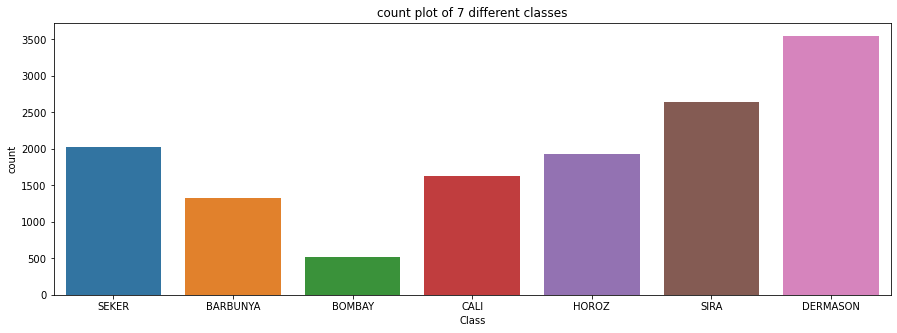

In [10]:
#count plot of 7 different classes

plt.figure(figsize=(15,5))
sns.countplot(bean_df['Class'],label="Count")
plt.title('count plot of 7 different classes')
plt.show() 

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>]], dtype=object)

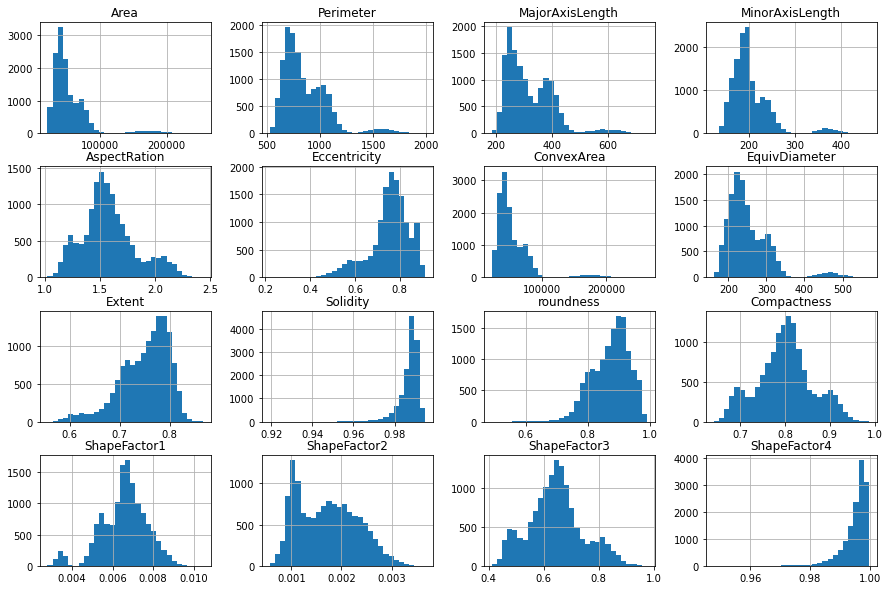

In [11]:
# The histogram of all columns

bean_df.hist(bins=30, figsize=(15, 10))


In [12]:
# the percenages of the uniques of response variable

bean_df['Class'].value_counts(normalize=True) * 100


DERMASON    26.052458
SIRA        19.366689
SEKER       14.892366
HOROZ       14.165014
CALI        11.975608
BARBUNYA     9.712732
BOMBAY       3.835133
Name: Class, dtype: float64

By grouping the whole dataframe based on the “Class” (last column in dataset) we compute
the mean and standard deviation associated with each group for all variables. 


In [13]:
df1=bean_df.groupby(bean_df['Class'])
df1.agg(['mean','std'])

Area                  Perimeter              \
                   mean           std         mean         std   
Class                                                            
BARBUNYA   69804.133132  10265.386454  1046.105764   89.629646   
BOMBAY    173485.059387  23327.688116  1585.619079  115.900954   
CALI       75538.211043   9379.881487  1057.634282   67.615137   
DERMASON   32118.710942   4676.129470   665.209536   50.467508   
HOROZ      53648.508817   7341.397869   919.859676   70.045927   
SEKER      39881.299951   4779.877395   727.672440   47.849014   
SIRA       44729.128604   4546.769886   796.418737   44.377084   

         MajorAxisLength            MinorAxisLength            AspectRation  \
                    mean        std            mean        std         mean   
Class                                                                         
BARBUNYA      370.044279  32.262810      240.309352  19.840274     1.544395   
BOMBAY        593.152075  53.196696      374.352547  23.299312     1.585550   
CALI          409.499538  29.508469      236.370616  14.670244     1.733663   
DERMASON      246.557279  20.664232      165.657143  12.549928     1.490471   
HOROZ         372.570290  30.220122      184.170663  13.481674     2.026119   
SEKER         251.291957  19.969504      201.909653  10.942797     1.245182   
SIRA          299.380258  20.766183      190.800250   9.156833     1.570083   

                    ... Compactness           ShapeFactor1            \
               std  ...        mean       std         mean       std   
Class               ...                                                
BARBUNYA  0.126057  ...    0.805001  0.033447     0.005357  0.000445   
BOMBAY    0.118832  ...    0.792622  0.030781     0.003442  0.000209   
CALI      0.091501  ...    0.756703  0.020564     0.005459  0.000337   
DERMASON  0.096373  ...    0.819110  0.026365     0.007755  0.000598   
HOROZ     0.135360  ...    0.700880  0.023620     0.007007  0.000506   
SEKER     0.082223  ...    0.896841  0.028727     0.006334  0.000335   
SIRA      0.096600  ...    0.797345  0.024494     0.006720  0.000326   

         ShapeFactor2           ShapeFactor3           ShapeFactor4            
                 mean       std         mean       std         mean       std  
Class                                                                          
BARBUNYA     0.001394  0.000213     0.649144  0.054347     0.995739  0.002649  
BOMBAY       0.000844  0.000135     0.629195  0.049052     0.991841  0.004454  
CALI         0.001107  0.000129     0.573022  0.031346     0.990584  0.004456  
DERMASON     0.002161  0.000284     0.671636  0.043190     0.996914  0.001896  
HOROZ        0.001048  0.000149     0.491791  0.033610     0.991926  0.006416  
SEKER        0.002541  0.000326     0.805149  0.051125     0.998383  0.001493  
SIRA         0.001683  0.000204     0.636358  0.039025     0.995385  0.002649  

[7 rows x 32 columns]

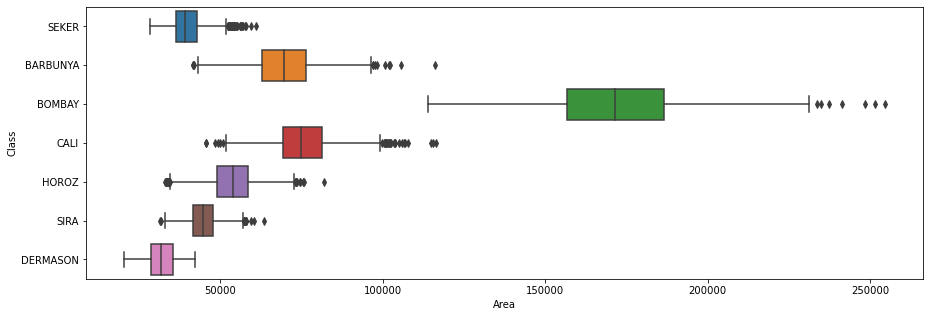

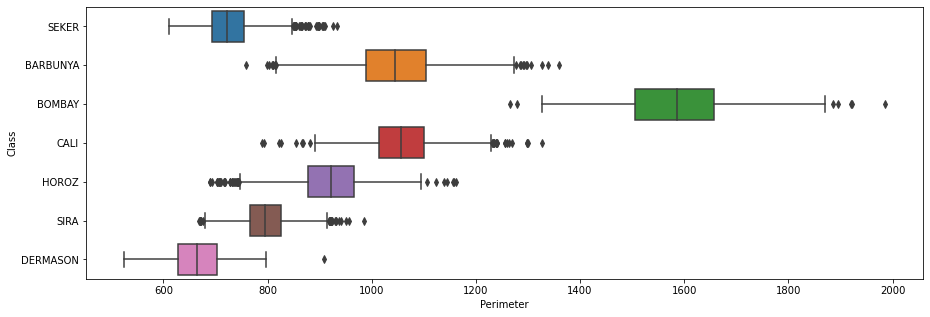

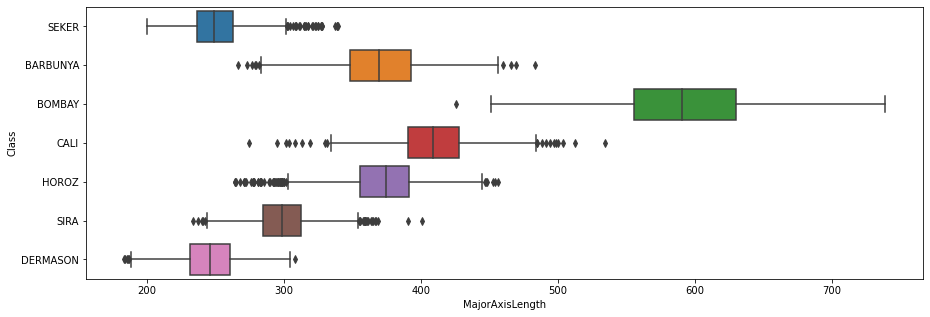

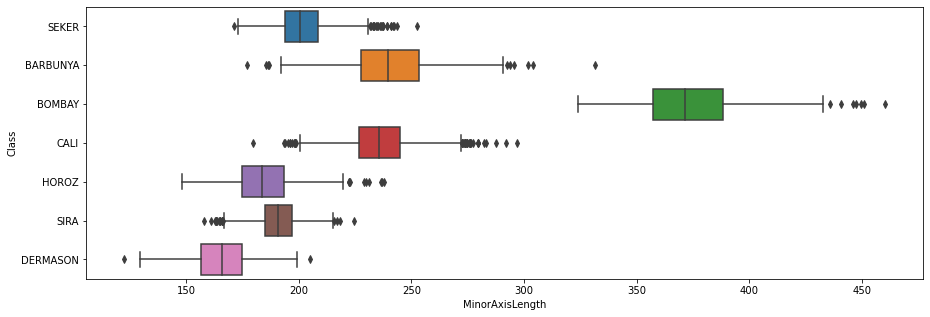

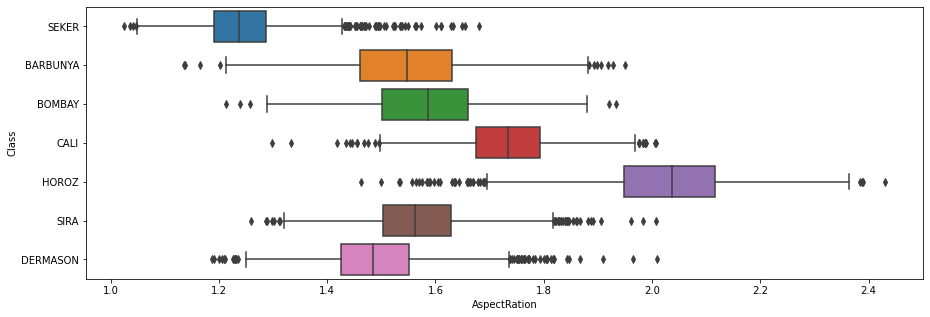

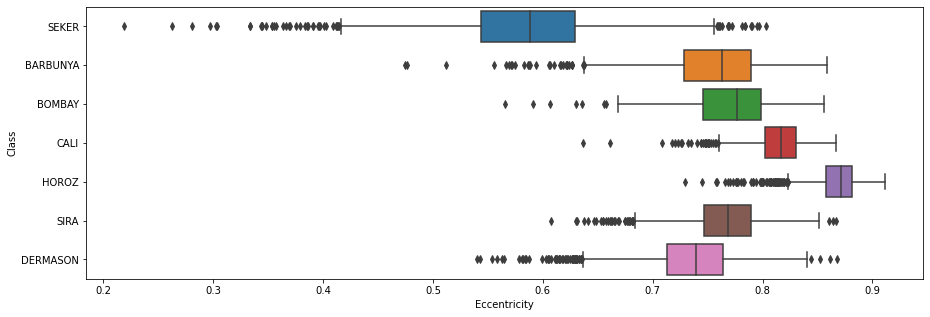

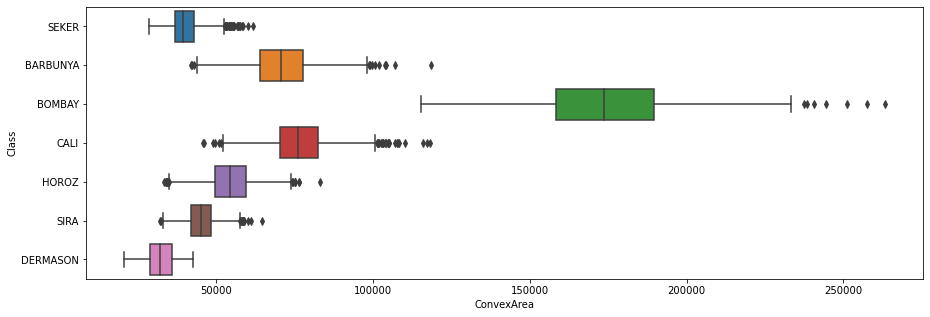

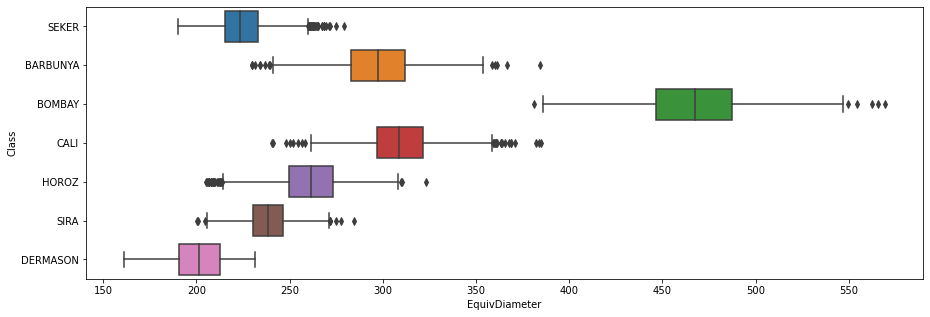

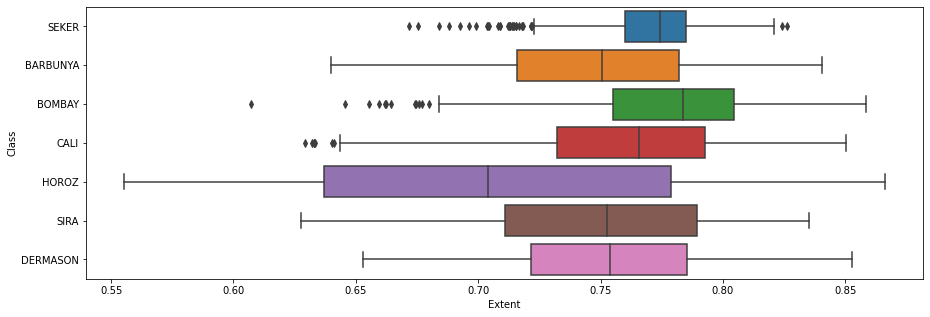

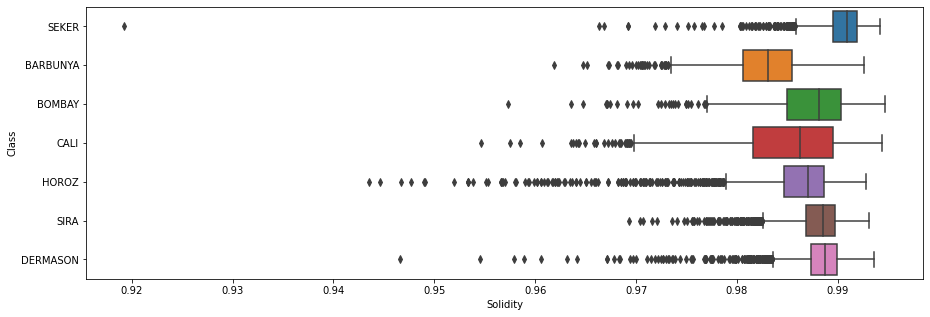

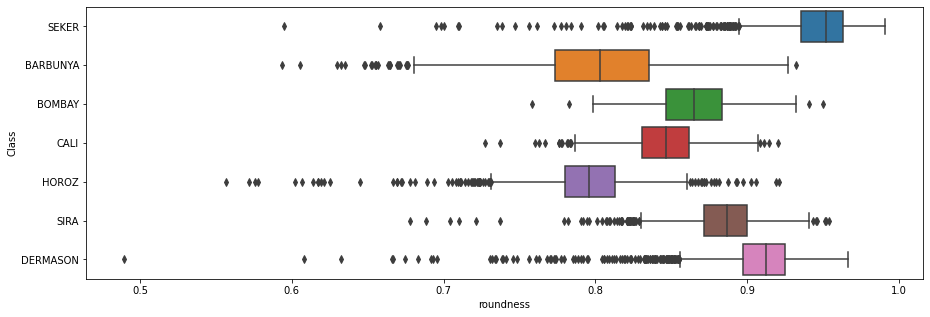

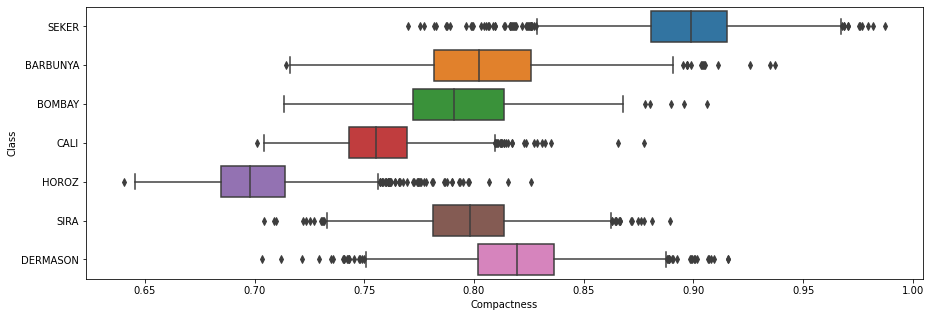

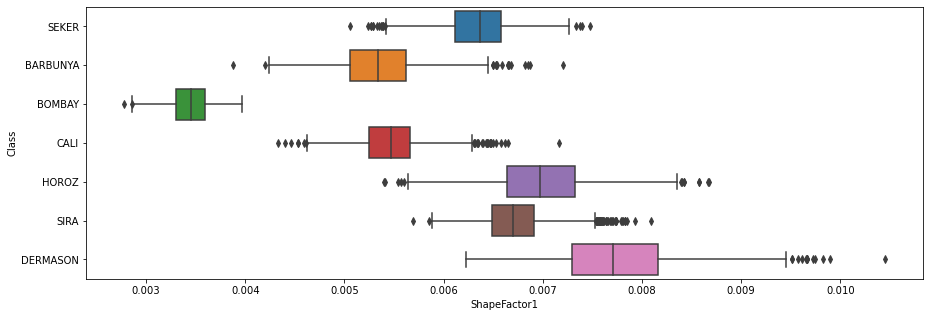

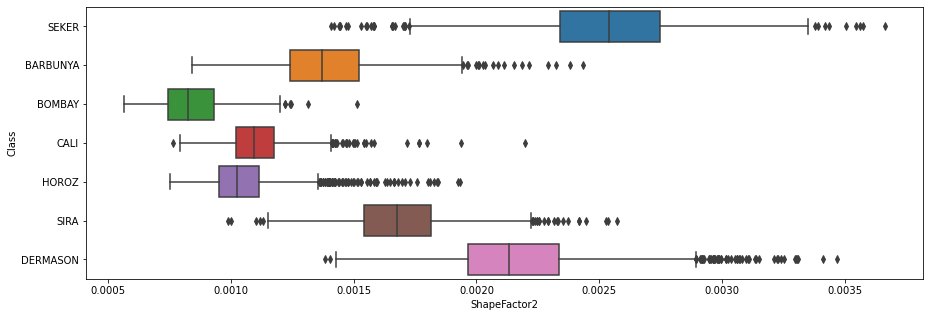

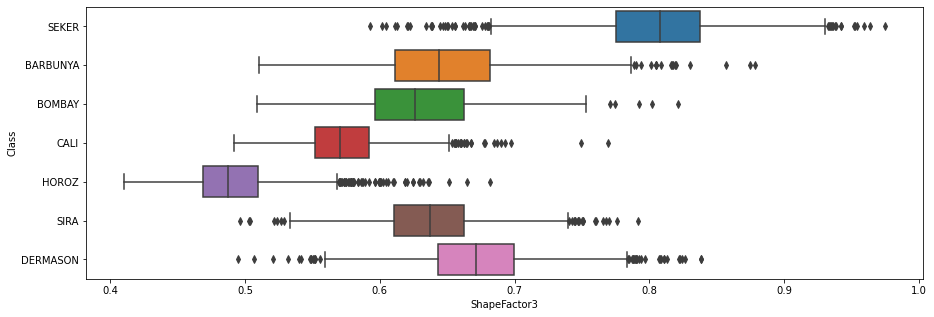

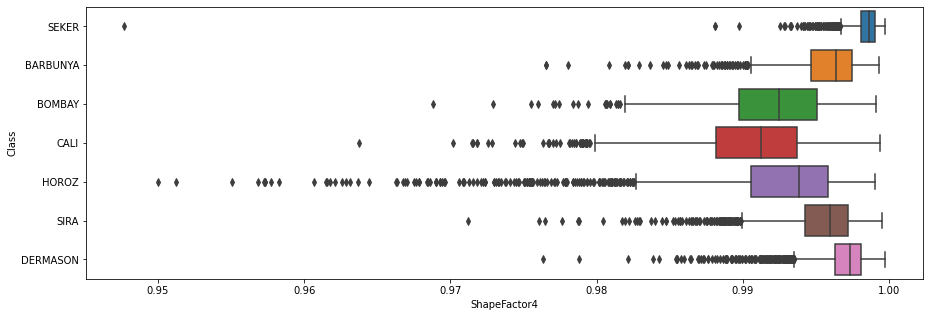

In [14]:
#  boxplot of all variables based on the category of response variable

cat_vars = ['Class']
num_vars = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea',
 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
 'ShapeFactor4']



for col in num_vars:
    plt.figure(figsize=(15,5))
    ax = sns.boxplot(data = bean_df, x = col, y = 'Class')




### outliers





As we can see there is some outliers which are below or under inter quartile range (IQR). based on applying z-score test, there is 1124 outliers in the dataset which will be removed from dataset.

In [15]:
# create a function to find outliers for each column

def find_outliers(col):
    from scipy import stats
    z=np.abs(stats.zscore(col))
    idx_outliers= np.where(z> 3, True,False)
    return pd.Series(idx_outliers, index=col.index)


In [16]:
idx1= find_outliers(bean_df['Area'])
idx2= find_outliers(bean_df['Perimeter'])
idx3= find_outliers(bean_df['MajorAxisLength'])
idx4= find_outliers(bean_df['MinorAxisLength'])
idx5= find_outliers(bean_df['AspectRation'])
idx6= find_outliers(bean_df['Eccentricity'])
idx7= find_outliers(bean_df['ConvexArea'])
idx8= find_outliers(bean_df['EquivDiameter'])
idx9= find_outliers(bean_df['Extent'])
idx10= find_outliers(bean_df['Solidity'])
idx11= find_outliers(bean_df['roundness'])
idx12= find_outliers(bean_df['Compactness'])
idx13= find_outliers(bean_df['ShapeFactor1'])
idx14= find_outliers(bean_df['ShapeFactor2'])
idx15= find_outliers(bean_df['ShapeFactor3'])
idx16= find_outliers(bean_df['ShapeFactor4'])


The new data set without outliers are created , this dataset has 12,487 obseravtion.

In [17]:
# create new data frame whitout outliers

bean_clean=bean_df.loc[idx1|idx2|idx3|idx4|idx5|idx6|idx7|idx8|idx9|idx10|idx11|idx12|idx13|idx14|idx15|idx16==False]
bean_clean.reset_index(inplace = True, drop = True)
bean_clean.shape

(12487, 17)

### Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix')

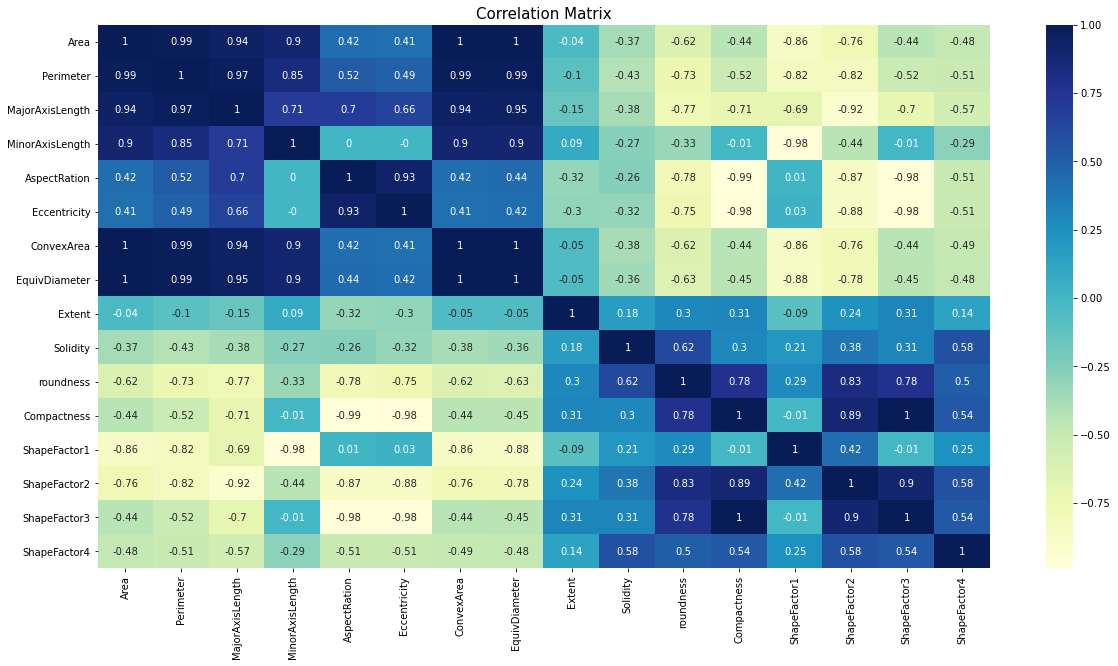

In [18]:
# correlation analysis

fig, heatmap_corr = plt.subplots(figsize=(20,10)) 
heatmap_corr=sns.heatmap(bean_clean.corr().round(2),cmap='YlGnBu',annot=True)
heatmap_corr.set_title("Correlation Matrix", fontsize=15)



### Observations:

From the statistics we observe above we find that:

    There appear to be three groups of feature.
    Two groups of features that appear to be highly positively correlated with each other.
    One group of features that appear to be slightly negatively correlated with each other.



### Pairplots

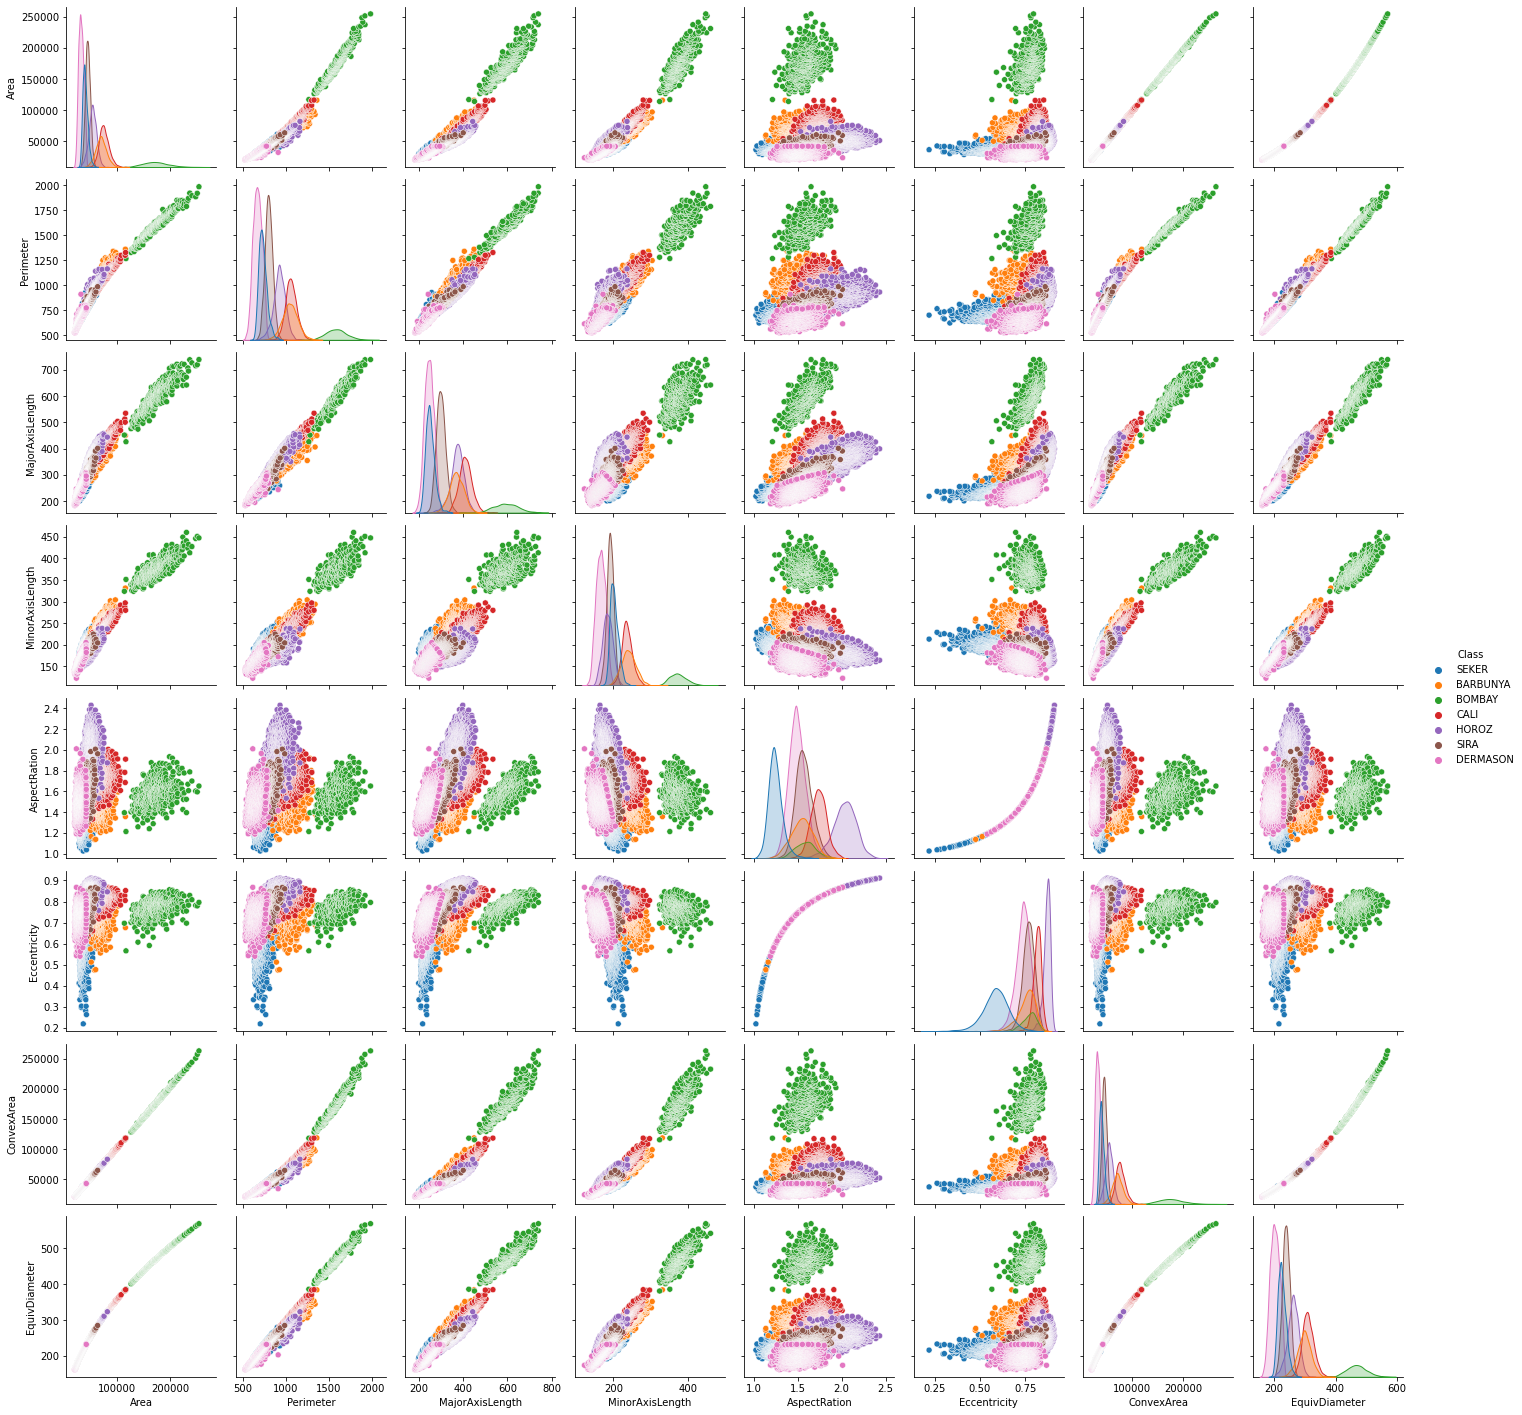

In [19]:
# Features that are Positively Correlated with each other (Part 1)

sns.pairplot(bean_df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea',
 'EquivDiameter','Class']], hue = 'Class')
plt.show()

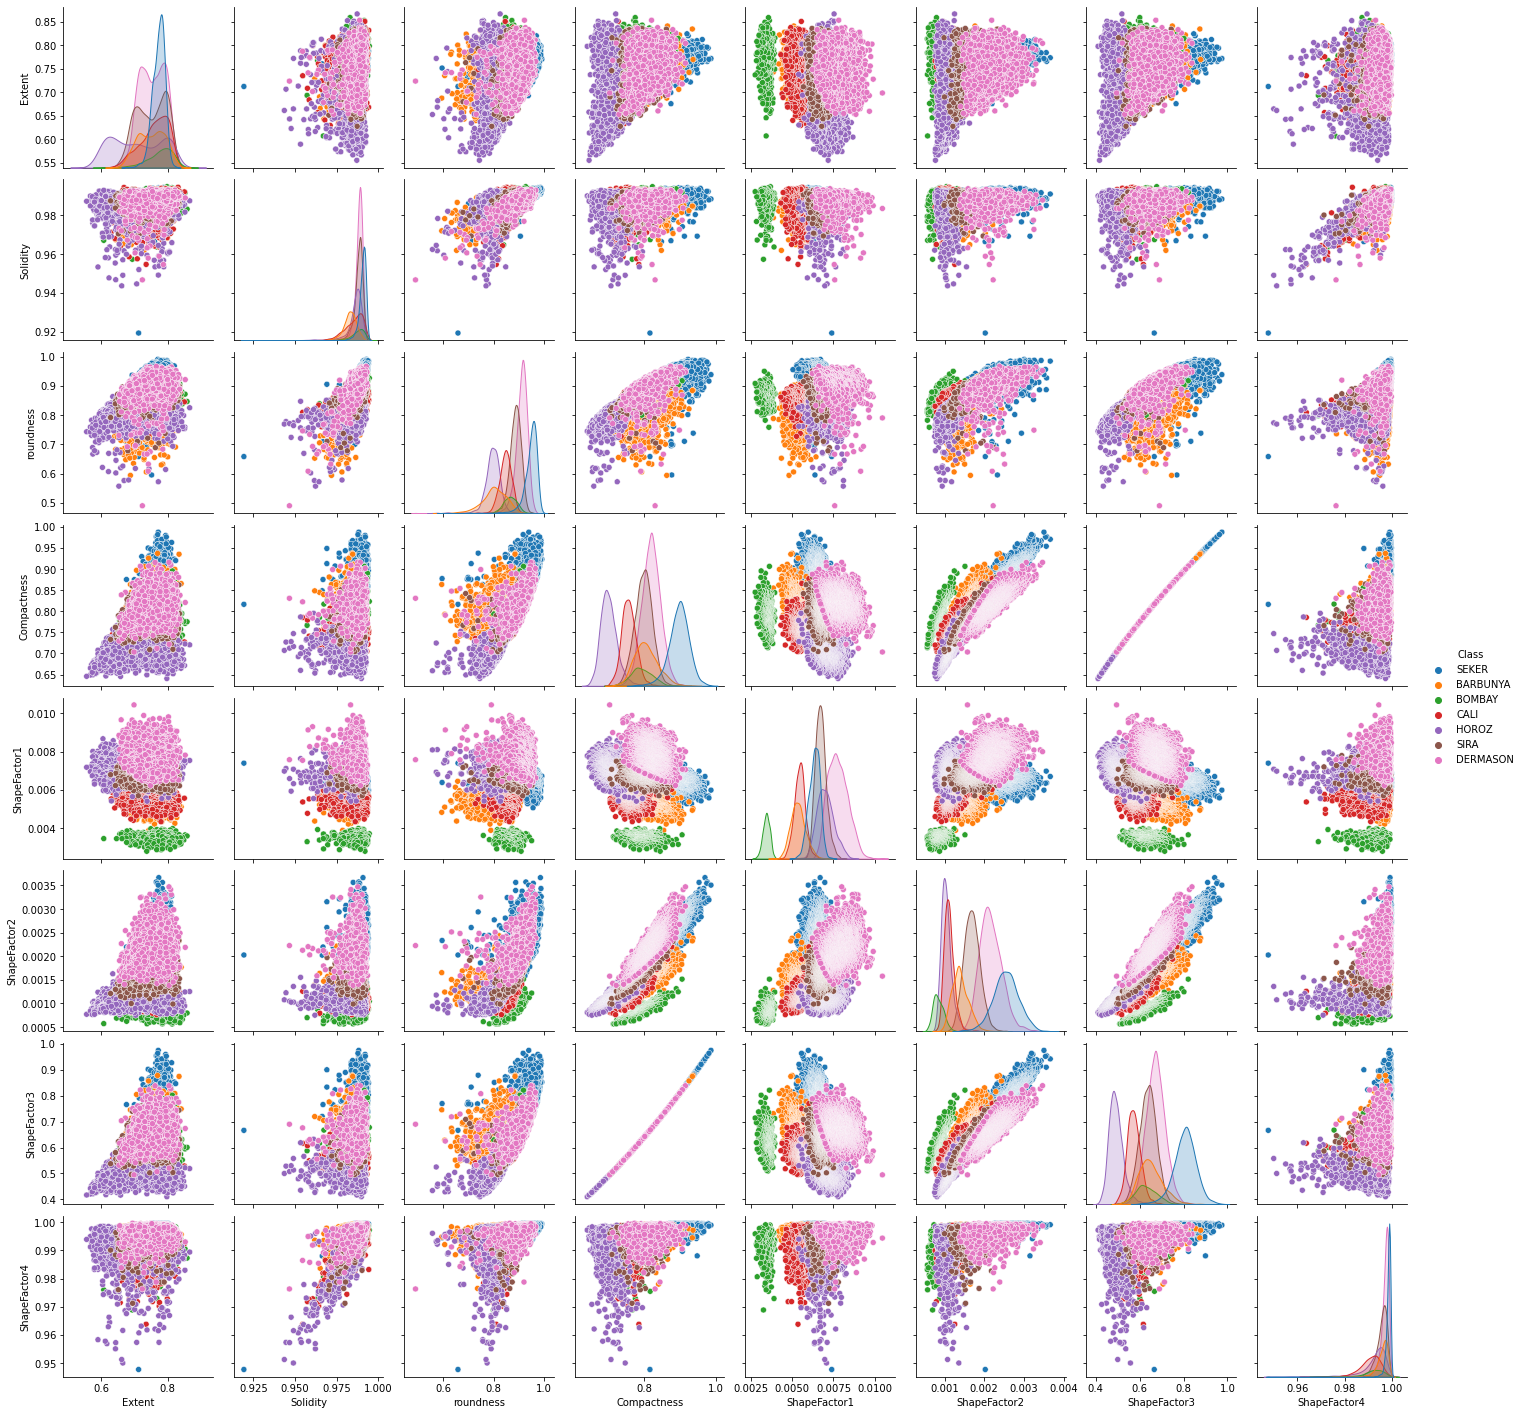

In [20]:
# Features that are Positively Correlated with each other (Part 2)

sns.pairplot(bean_df[['Extent', 'Solidity', 'roundness','Compactness', 'ShapeFactor1','ShapeFactor2',
                 'ShapeFactor3','ShapeFactor4','Class']], hue = 'Class')
plt.show()

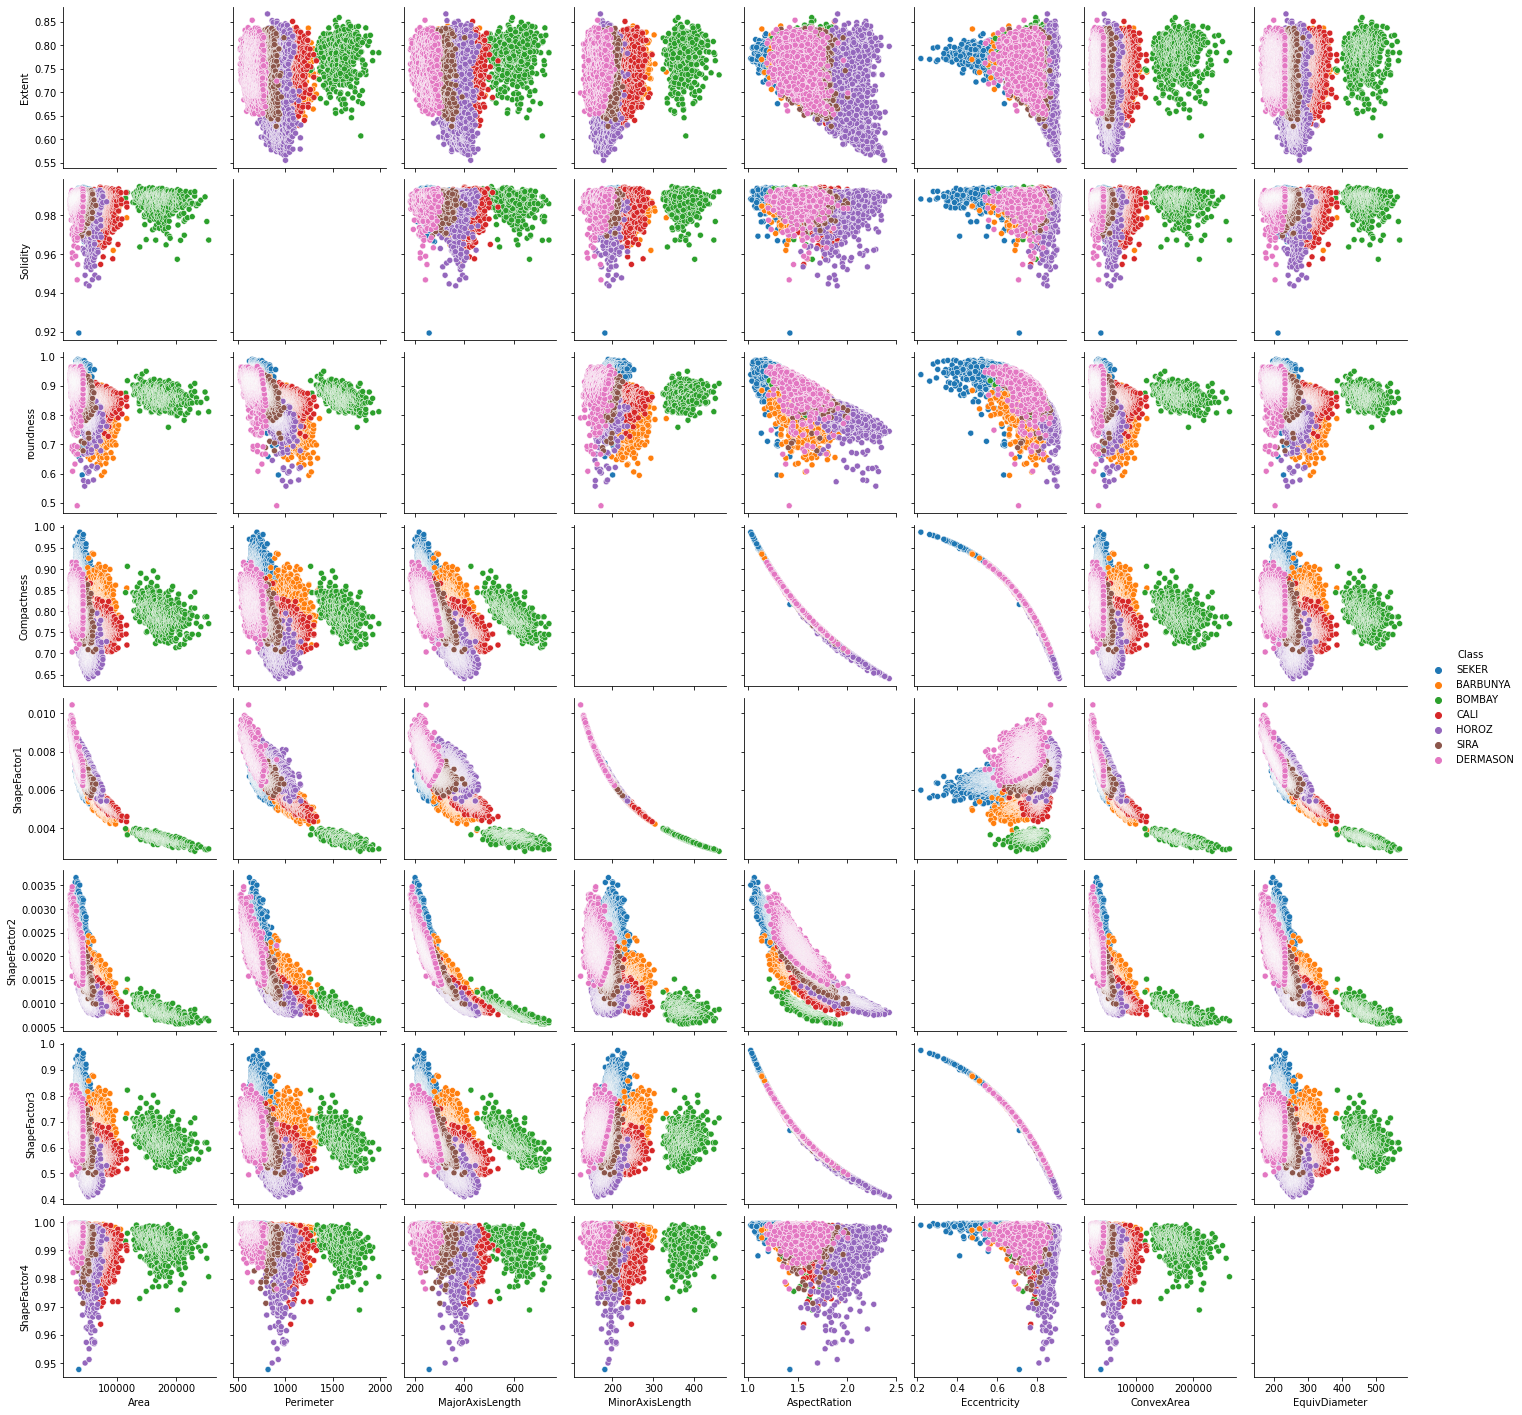

In [21]:
# Features that are not Positively Correlated with each other
sns.pairplot(bean_df, 
             x_vars= ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
                      'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter'],
             y_vars= ['Extent', 'Solidity', 'roundness','Compactness', 'ShapeFactor1','ShapeFactor2',
                      'ShapeFactor3','ShapeFactor4']
             , hue = 'Class')
plt.show()


### Observations

From these charts above we observe that:

Bombay bean has the most visually distinct relationship to our features. Most other bean strains are harder to     identify with the human eye.

We have a lot of variables with high correlation something we may need to consider when it comes to modeling choices.



### Multicollinearity Analysis

There is a strong Multicollinearity in the dataset :

In [22]:
# identify Multicollinearity

X=bean_clean.iloc[:,:-1]
X=sm.add_constant(X)
[inf.variance_inflation_factor(X.values,i)for i in range (X.shape[1])]


[33882249.830856726,
 162715.42619926808,
 4018.9266044081014,
 107203.52112204448,
 90930.1447298712,
 25318.915506317637,
 3892.2193142468423,
 156236.98148999087,
 380368.5370013227,
 1.1681290543556684,
 30.23374863592997,
 179.02108362881157,
 608900.471552379,
 1595.546050975989,
 3582.3536895886555,
 467479.06765174575,
 81.89702332593403]

For removing Multicollinearity we Apply PCA.

### Principal Component Analysis (PCA)

Text(0, 0.5, 'Explained varibility')

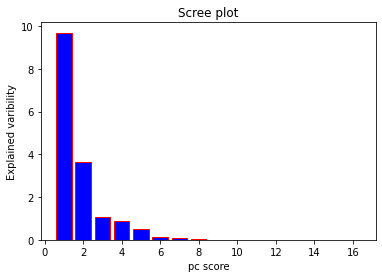

In [23]:
# scaling the values of predictors

X=bean_clean.iloc[:,:-1]
X=scale(X)

# PCA for removing multicollinearity

p=PCA()
p.fit(X)
y=p.transform(X)

# scree plot

plt.bar(range(1,17),p.explained_variance_,color='blue',edgecolor='red')
plt.title('Scree plot') 
plt.xlabel('pc score')
plt.ylabel('Explained varibility')



 With take a look at this scree plot, we’ll see the variability of variance between pc score 1 and pc score 2, and pc score 2 and pc score 3 is notable, but between pc score 3 and pc score4 is not significant and after pc score 4 , the variability of variance  doesn’t change anymore. 


In [24]:
#provide the matrix of directions

W=p.components_.T
pd.DataFrame(W[:,:17],index=bean_clean.columns[:-1])

0         1         2         3         4         5   \
Area             0.288082  0.222453 -0.060128 -0.027938  0.022701 -0.101679   
Perimeter        0.302387  0.171249 -0.027203 -0.041549 -0.078338  0.102519   
MajorAxisLength  0.316007  0.059088 -0.110420 -0.017441  0.038084  0.054510   
MinorAxisLength  0.205107  0.400892  0.001869 -0.060873  0.013790 -0.064372   
AspectRation     0.242237 -0.321622 -0.159995  0.018713  0.000678  0.263755   
Eccentricity     0.238473 -0.326376 -0.122401  0.066385 -0.013912 -0.473184   
ConvexArea       0.288543  0.221680 -0.050227 -0.025534  0.018274 -0.106325   
EquivDiameter    0.290609  0.218708 -0.071192 -0.039209  0.021824 -0.039885   
Extent          -0.069033  0.189812 -0.290113  0.909894 -0.213718  0.033572   
Solidity        -0.158177  0.022180 -0.768846 -0.185434  0.366031  0.360264   
roundness       -0.271819  0.141694 -0.178260  0.027182  0.487806 -0.646940   
Compactness     -0.247618  0.323988  0.135703 -0.045976 -0.015874  0.028643   
ShapeFactor1    -0.194900 -0.404263  0.037108  0.086289 -0.037660 -0.037242   
ShapeFactor2    -0.306318  0.119652  0.129626 -0.005615  0.002296  0.173390   
ShapeFactor3    -0.247318  0.324653  0.130965 -0.052232 -0.013506  0.127965   
ShapeFactor4    -0.205947  0.073039 -0.417688 -0.333446 -0.755802 -0.259953   

                       6         7         8         9         10        11  \
Area             0.331505  0.226073  0.011411  0.188167  0.290478  0.258642   
Perimeter        0.060598  0.066911 -0.109034 -0.243110 -0.824150  0.306336   
MajorAxisLength  0.223266 -0.182777 -0.291218  0.020956  0.023162 -0.273110   
MinorAxisLength -0.096572  0.102205  0.483772 -0.300277  0.022439 -0.455665   
AspectRation     0.291637 -0.496679  0.168171 -0.499308  0.235253  0.156969   
Eccentricity    -0.262321  0.398015 -0.322681 -0.483129  0.158108 -0.005675   
ConvexArea       0.333026  0.220945  0.011460  0.163756  0.203574  0.342275   
EquivDiameter    0.064862 -0.019501  0.007301  0.005141 -0.023924 -0.449559   
Extent          -0.008341 -0.016144  0.000561  0.000463  0.000349  0.000459   
Solidity        -0.117704  0.266653 -0.010447  0.004882  0.004474  0.002595   
roundness        0.225926 -0.358473  0.039143 -0.061936 -0.169271  0.055424   
Compactness     -0.071396  0.141519  0.014903 -0.305540  0.127361  0.181199   
ShapeFactor1     0.511694  0.437974  0.452996 -0.061592 -0.196564 -0.135794   
ShapeFactor2     0.465858  0.128044 -0.568975 -0.200801  0.012407 -0.318488   
ShapeFactor3     0.002892  0.021753  0.075536 -0.404587  0.171123  0.238907   
ShapeFactor4     0.096716 -0.132939  0.006458  0.017344 -0.005827 -0.015897   

                       12        13        14        15  
Area             0.068973 -0.630622  0.309383 -0.079373  
Perimeter        0.047888 -0.068962  0.029210 -0.003908  
MajorAxisLength -0.670363  0.230277  0.363871 -0.035867  
MinorAxisLength  0.287847  0.183405  0.343443 -0.051185  
AspectRation     0.165228 -0.055155 -0.054473  0.140499  
Eccentricity    -0.006773  0.000899 -0.018000 -0.054387  
ConvexArea       0.128550  0.631644 -0.294412  0.073105  
EquivDiameter   -0.134161 -0.321948 -0.721346  0.098525  
Extent           0.000094 -0.000010 -0.000028 -0.000026  
Solidity         0.001801  0.008618 -0.003577  0.000882  
roundness        0.011625 -0.015165  0.005660 -0.000565  
Compactness     -0.295279 -0.065046  0.041447  0.742442  
ShapeFactor1    -0.257680 -0.007095 -0.026989  0.007149  
ShapeFactor2     0.379263  0.020003  0.039365 -0.009887  
ShapeFactor3    -0.318220 -0.014550 -0.196564 -0.632966  
ShapeFactor4     0.002317  0.005496  0.009237 -0.003580

Explained variability for pc score 1 is 60%, for pc score 1 and 2 is 83% , for pc score1 and 2 and 3  is 90%  ,in the other hand  If:
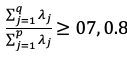
Then we pick the first q components. Then we’ll choose pc score 1 , pc score 2 ,pc score 3 and 4.it means they can describe about 95% information from the data.



In [25]:
p.explained_variance_ratio_.cumsum()

array([0.60538915, 0.83324921, 0.90106777, 0.95459026, 0.98471955,
       0.9924503 , 0.99645433, 0.99949029, 0.99991475, 0.99995749,
       0.99998142, 0.99999447, 0.99999958, 0.99999985, 0.99999994,
       1.        ])

In [26]:

pd.DataFrame(p.explained_variance_ratio_,index=range(1,17),columns=['Explained varibility'])

Explained varibility
1           6.053891e-01
2           2.278601e-01
3           6.781856e-02
4           5.352249e-02
5           3.012930e-02
6           7.730741e-03
7           4.004034e-03
8           3.035963e-03
9           4.244599e-04
10          4.273327e-05
11          2.392928e-05
12          1.305351e-05
13          5.108736e-06
14          2.708957e-07
15          9.437291e-08
16          5.690822e-08

In [27]:
# convert y to data frame 

y=pd.DataFrame(y)

# create new predictors with the first four pc-scores

new_pred=y.iloc[:,:4]
new_pred.head()

0         1         2         3
0 -5.514595  1.447986  0.802026 -0.177449
1 -5.259372  1.480066  0.453538  0.021913
2 -4.509615  2.017088  4.198097  1.120452
3 -5.434183  2.090204  0.630342 -0.144934
4 -4.857133  2.171600  2.311346 -0.215962

As we can see the VIF after applying PCA reduced significantly to 1.

In [28]:
# identify Multicollinearity after PCA

X_pca= new_pred[[0,1,2,3]]
X_pca=sm.add_constant(X_pca)
[inf.variance_inflation_factor(X_pca.values,i)for i in range (X_pca.shape[1])]

[1.0, 1.0, 1.0, 1.0000000000000002, 1.0000000000000004]

Now we create a new dataframe of pc-socers and the variable "class "as response variable. the new data set has 12487 rows and 5 columns.

In [29]:
labels=bean_clean['Class']
labels=pd.DataFrame(labels)
data_new=pd.concat([new_pred,labels],axis=1)
data_new.shape

(12487, 5)

In [30]:
data_new['Class'].value_counts()

DERMASON    3520
SIRA        2623
SEKER       1897
HOROZ       1632
CALI        1544
BARBUNYA    1261
BOMBAY        10
Name: Class, dtype: int64

### Balancing the train data set

In [31]:
# split test and train data

bean_train, bean_test = train_test_split(data_new, test_size = 0.25, random_state = 7)

Based on the following results, the train datset is not balanced, so the data needs to be balanced in the class of 'BOMBAY'.


In [32]:
#get a percentage of a classes on training datase

bean_train['Class'].value_counts(normalize=True) * 100

DERMASON    28.435665
SIRA        21.270689
SEKER       15.269621
HOROZ       12.717565
CALI        12.269087
BARBUNYA     9.973305
BOMBAY       0.064068
Name: Class, dtype: float64

In [33]:
# balaning the data

to_resample= bean_train.loc[bean_train['Class'] == 'BOMBAY' ]
our_sample=to_resample.sample(n=1000,replace=True)
bean_train_rebal=pd.concat([bean_train, our_sample])

In [50]:
# check the balancing

bean_train_rebal['Class'].value_counts(normalize=True) * 100

DERMASON    25.692233
SIRA        19.218524
SEKER       13.796430
HOROZ       11.490593
CALI        11.085384
BOMBAY       9.705740
BARBUNYA     9.011095
Name: Class, dtype: float64

In [51]:
y_train = bean_train_rebal['Class']
y_test = bean_test['Class']
X_train = bean_train_rebal.drop(['Class'], axis=1, inplace=False)
X_test = bean_test.drop(['Class'], axis=1, inplace=False)


### Data Analytics
#### Model Choice

Because we are lucky enough to have labeled data, we will be employing a supervised learning method. Our goal is to identify one of seven different types of dry beans from data features that were taken with a high-resolution camera. 


### Modeling

In [36]:
#Decision Tree classifier (model01)

bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(), sampling_strategy='auto',replacement=False,
                                random_state=0)

#Train the classifier

model01 = bbc.fit(X_train, y_train)
y_pred1= model01.predict(X_test)

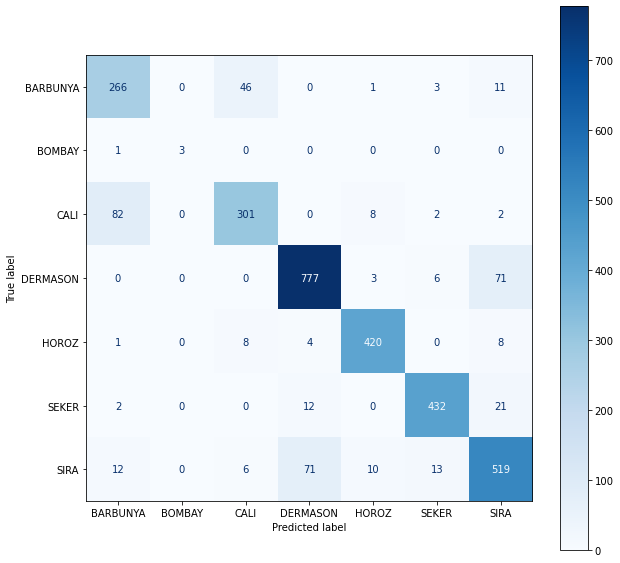

In [37]:
# Plot the Confusion Matrix of model 01

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model01, X_test, y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

In [39]:
accuracy_score(y_test, y_pred1)

0.8705957719410634

In [40]:
# Evaluation of model 01

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    BARBUNYA       0.73      0.81      0.77       327
      BOMBAY       1.00      0.75      0.86         4
        CALI       0.83      0.76      0.80       395
    DERMASON       0.90      0.91      0.90       857
       HOROZ       0.95      0.95      0.95       441
       SEKER       0.95      0.93      0.94       467
        SIRA       0.82      0.82      0.82       631

    accuracy                           0.87      3122
   macro avg       0.88      0.85      0.86      3122
weighted avg       0.87      0.87      0.87      3122



In [41]:
# Applying Discriminant Analysis (model 02 and model 03)

lda= LinearDiscriminantAnalysis()
qda= QuadraticDiscriminantAnalysis()
model02=lda.fit(X_train,y_train)
model03=qda.fit(X_train,y_train)
y_pred2 = model02.predict(X_test)
y_pred3 = model03.predict(X_test)
print(lda.score(X_test,y_test))
print(qda.score(X_test,y_test))

0.8725176169122357
0.8789237668161435


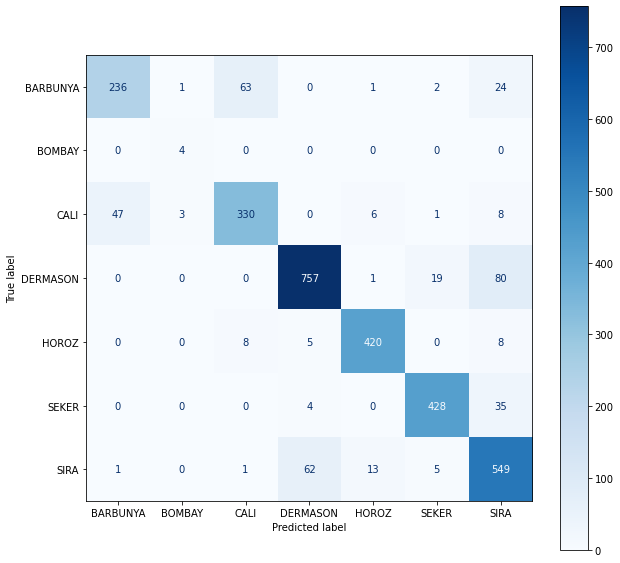

In [42]:
# Plot the Confusion Matrix of model 02

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(model02, X_test, y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

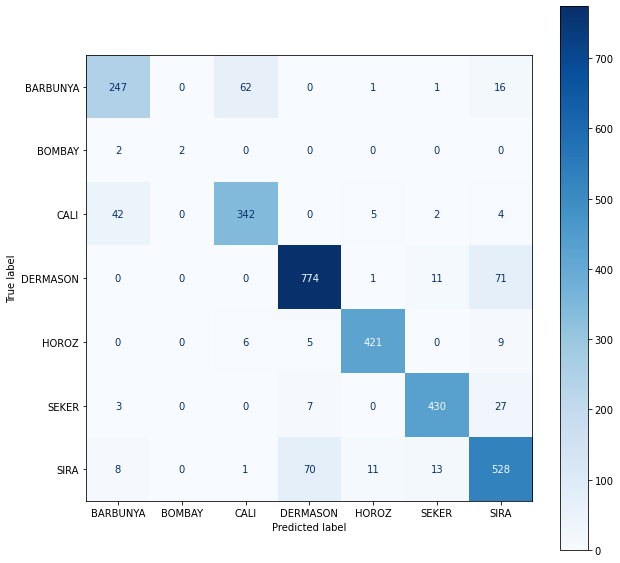

In [43]:
# Plot the Confusion Matrix of model 03

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(model03, X_test, y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

In [44]:
# Evaluation of model 02

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

    BARBUNYA       0.83      0.72      0.77       327
      BOMBAY       0.50      1.00      0.67         4
        CALI       0.82      0.84      0.83       395
    DERMASON       0.91      0.88      0.90       857
       HOROZ       0.95      0.95      0.95       441
       SEKER       0.94      0.92      0.93       467
        SIRA       0.78      0.87      0.82       631

    accuracy                           0.87      3122
   macro avg       0.82      0.88      0.84      3122
weighted avg       0.88      0.87      0.87      3122



In [45]:
# Evaluation of model 03

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

    BARBUNYA       0.82      0.76      0.79       327
      BOMBAY       1.00      0.50      0.67         4
        CALI       0.83      0.87      0.85       395
    DERMASON       0.90      0.90      0.90       857
       HOROZ       0.96      0.95      0.96       441
       SEKER       0.94      0.92      0.93       467
        SIRA       0.81      0.84      0.82       631

    accuracy                           0.88      3122
   macro avg       0.89      0.82      0.84      3122
weighted avg       0.88      0.88      0.88      3122



In [46]:
#Logistic Regression (model 04)

X=bean_train_rebal.iloc[:,:-1]
X=sm.add_constant(X)
y=pd.DataFrame(bean_train_rebal[['Class']])
log_regression = LogisticRegression()
model04=log_regression.fit(X,y)

#validate the model

X_test=bean_test.iloc[:,:-1]
X_test=sm.add_constant(X_test)
y_test=pd.DataFrame(bean_test[['Class']])
y_pred4 = model04.predict(X_test)
accuracy_score(y_test, y_pred4)



/Users/fatemehkhosravi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/fatemehkhosravi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8811659192825112

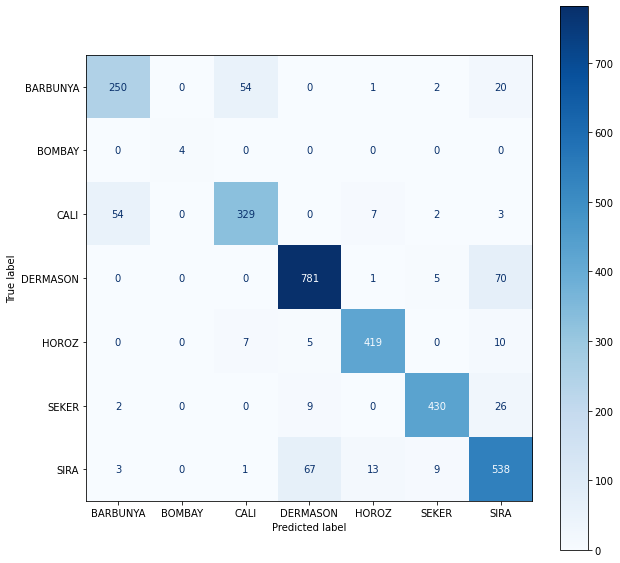

In [47]:
# Plot the Confusion Matrix of model 04

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(model04, X_test, y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

In [48]:
# Evaluation of model 04

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

    BARBUNYA       0.81      0.76      0.79       327
      BOMBAY       1.00      1.00      1.00         4
        CALI       0.84      0.83      0.84       395
    DERMASON       0.91      0.91      0.91       857
       HOROZ       0.95      0.95      0.95       441
       SEKER       0.96      0.92      0.94       467
        SIRA       0.81      0.85      0.83       631

    accuracy                           0.88      3122
   macro avg       0.90      0.89      0.89      3122
weighted avg       0.88      0.88      0.88      3122



In [52]:
# Random Forests (model 05)

rfy=np.ravel(y_train)
model05=RandomForestClassifier(n_estimators=100, criterion = 'gini').fit(X_train,rfy)
y_pred5=model05.predict(X_test)
accuracy_score(y_test, y_pred5)

0.8792440743113389

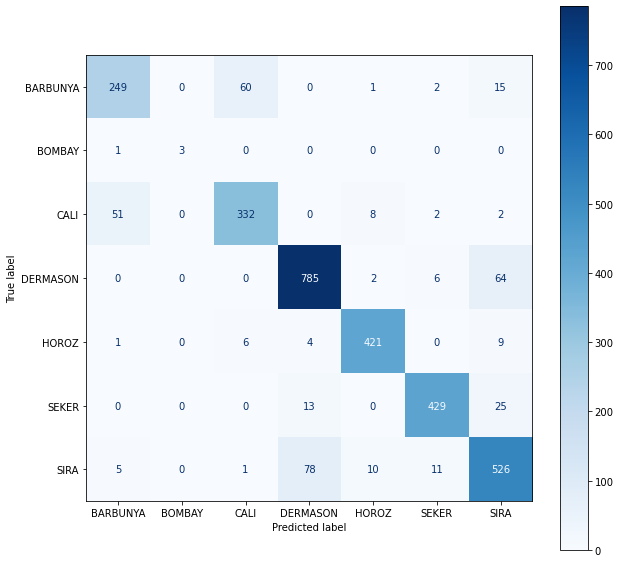

In [53]:
# Plot the Confusion Matrix of model 05

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(model05, X_test, y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

    BARBUNYA       0.81      0.76      0.79       327
      BOMBAY       1.00      0.75      0.86         4
        CALI       0.83      0.84      0.84       395
    DERMASON       0.89      0.92      0.90       857
       HOROZ       0.95      0.95      0.95       441
       SEKER       0.95      0.92      0.94       467
        SIRA       0.82      0.83      0.83       631

    accuracy                           0.88      3122
   macro avg       0.89      0.85      0.87      3122
weighted avg       0.88      0.88      0.88      3122

